# 뉴럴네트워크 다중분류(공기오염 데이터셋)

In [33]:
#!wget https://raw.githubusercontent.com/devdio/datasets/refs/heads/main/pollution_dataset.csv

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

## 1.데이터 준비

In [35]:
df = pd.read_csv('pollution_dataset.csv')
df.shape

(5000, 10)

In [36]:
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [37]:
df.columns = [col.replace(' ', '_') for col in df.columns]
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air_Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [38]:
df.isna().sum()

,0
Temperature,0
Humidity,0
PM2.5,0
PM10,0
NO2,0
SO2,0
CO,0
Proximity_to_Industrial_Areas,0
Population_Density,0
Air_Quality,0


## 2.데이터 분리

In [39]:
X = df.drop('Air_Quality', axis=1)
y = df['Air_Quality']

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 9), (1000, 9), (4000,), (1000,))

### 스케일링

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
ss = StandardScaler()

# 학습
ss.fit(X_train)

# 데이터 변경
X_train_s = ss.transform(X_train)

### 레이블 인코딩

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
le = LabelEncoder()
le.fit(y_train)

y_train_e = le.transform(y_train)
y_train_e

array([1, 0, 3, ..., 3, 0, 1])

In [47]:
le.classes_

array(['Good', 'Hazardous', 'Moderate', 'Poor'], dtype=object)

### 원핫인코딩

In [48]:
from keras.utils import to_categorical

In [49]:
y_train_o = to_categorical(y_train_e)
y_train_o[:5]

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [50]:
type(X_train_s), type(y_train_o)

(numpy.ndarray, numpy.ndarray)

## 3.모델 만들기

In [51]:
from keras import layers

In [52]:
model = keras.Sequential([
    layers.Input(shape=(9,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(4, activation='softmax')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 16)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │              36 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 332 (1.30 KB)

 Trainable params: 332 (1.30 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['acc']
)

In [54]:
EPOCHS = 200
BATCHSIZE = 32

history = model.fit(
    X_train_s,
    y_train_o,
    epochs=EPOCHS,
    batch_size=BATCHSIZE,
    validation_split=0.2,
)

Epoch 1/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - acc: 0.4443 - loss: 1.3036 - val_acc: 0.5150 - val_loss: 0.9711
Epoch 2/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.5589 - loss: 0.8924 - val_acc: 0.6837 - val_loss: 0.7659
Epoch 3/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - acc: 0.7493 - loss: 0.6956 - val_acc: 0.8325 - val_loss: 0.5046
Epoch 4/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.8461 - loss: 0.4613 - val_acc: 0.8687 - val_loss: 0.3548
Epoch 5/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.8724 - loss: 0.3397 - val_acc: 0.9125 - val_loss: 0.2792
Epoch 6/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9074 - loss: 0.2645 - val_acc: 0.9212 - val_loss: 0.2402
Epoch 7/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9156 - loss: 0.2412 - val_acc: 0.9225 - val_loss: 0.2148
Epoch 8/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9177 - loss: 0.2208 - val_acc: 0.9300 - val_loss: 0.2005
Epoch 9/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms

In [55]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train_loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val_loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['acc'], label='train_acc')
    plt.plot(hist['epoch'], hist['val_acc'], label='val_acc')
    plt.title('Accuracy Curve')
    plt.legend()

    plt.show()

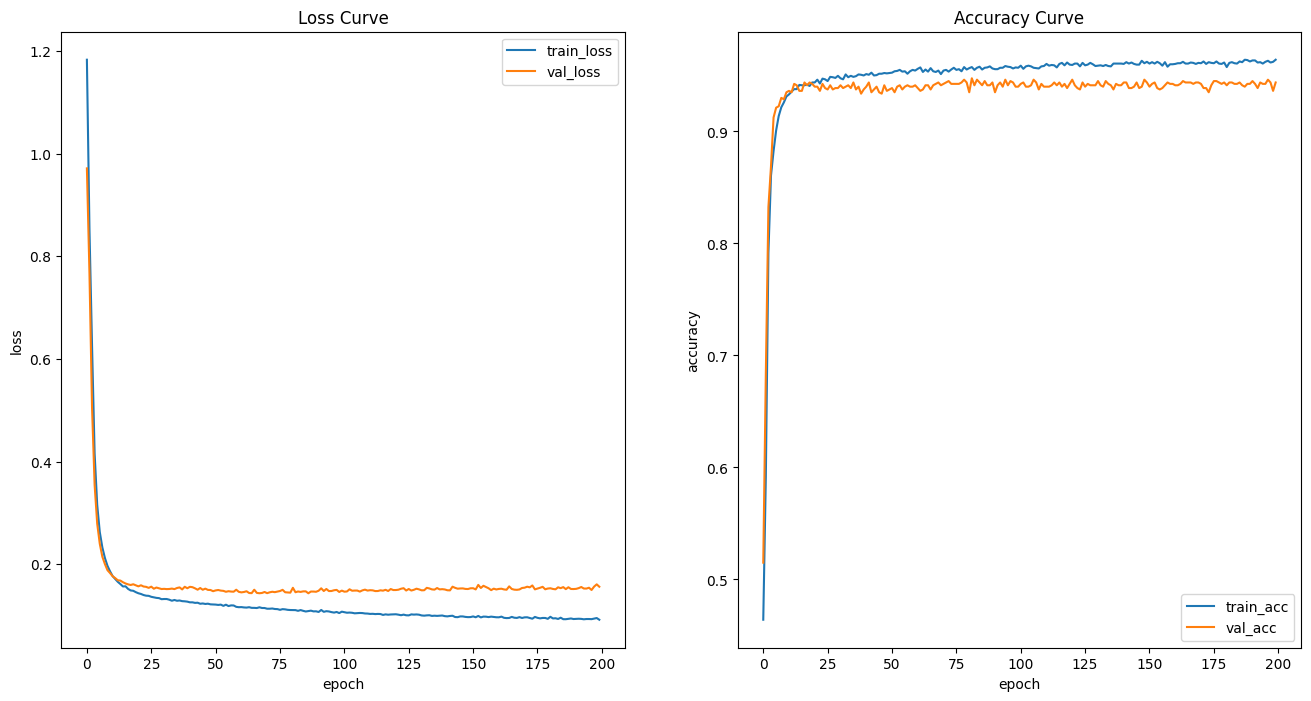

In [56]:
plot_history(history)

## 4.테스트

In [57]:
X_test_s = ss.transform(X_test)

In [58]:
y_test_e = le.transform(y_test)

In [59]:
y_test_o = to_categorical(y_test_e)
y_test_o[:10]

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]])

In [60]:
y_pred = model.predict(X_test_s)
y_pred

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[3.4182479e-20, 9.8836935e-01, 8.5211387e-12, 1.1630648e-02],
       [9.9999958e-01, 1.6244646e-10, 3.6239450e-07, 3.9141020e-14],
       [3.9929801e-04, 4.4724322e-07, 9.9878550e-01, 8.1485027e-04],
       ...,
       [7.4703237e-08, 3.3103508e-05, 4.9951145e-01, 5.0045532e-01],
       [1.5731979e-07, 6.1504903e-09, 9.9904722e-01, 9.5264131e-04],
       [2.7443286e-12, 1.1307465e-02, 9.2029208e-05, 9.8860043e-01]],
      dtype=float32)

In [61]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([1, 0, 2, 1, 0, 1, 0, 0, 0, 2, 3, 0, 1, 0, 2, 0, 0, 0, 2, 3, 0, 0,
       3, 2, 0, 3, 0, 0, 2, 2, 0, 3, 3, 2, 2, 2, 2, 2, 2, 0, 3, 2, 1, 0,
       0, 3, 2, 3, 0, 0, 2, 0, 0, 0, 0, 2, 1, 2, 3, 0, 0, 0, 0, 2, 0, 3,
       3, 0, 2, 2, 0, 0, 3, 0, 0, 2, 2, 2, 0, 0, 0, 1, 3, 0, 2, 2, 1, 2,
       2, 3, 2, 0, 0, 3, 3, 2, 2, 0, 3, 0, 1, 2, 3, 2, 1, 0, 0, 0, 2, 0,
       2, 2, 2, 0, 2, 3, 1, 0, 0, 0, 2, 2, 2, 2, 3, 0, 2, 2, 0, 0, 2, 0,
       1, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 1, 0, 2, 2, 3, 3, 2, 0,
       0, 3, 2, 2, 2, 2, 1, 0, 2, 1, 3, 2, 0, 0, 0, 0, 2, 3, 0, 1, 0, 0,
       0, 2, 0, 3, 3, 0, 2, 0, 0, 3, 0, 0, 0, 0, 1, 1, 2, 3, 2, 2, 1, 3,
       3, 3, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 3, 2, 2, 2, 2, 2, 0, 1,
       0, 2, 0, 2, 0, 2, 1, 3, 2, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 2, 2, 0,
       2, 1, 0, 2, 0, 0, 0, 0, 2, 2, 0, 1, 3, 3, 0, 0, 1, 3, 0, 2, 0, 1,
       0, 2, 3, 3, 2, 0, 2, 2, 2, 0, 3, 1, 2, 0, 3, 0, 1, 0, 0, 3, 2, 0,
       3, 2, 0, 2, 2, 1, 0, 0, 2, 2, 3, 2, 2, 0, 2,

In [66]:
y_test_e

array([1, 0, 2, 1, 0, 1, 0, 0, 0, 2, 2, 0, 3, 0, 2, 0, 0, 0, 2, 3, 0, 0,
       3, 2, 0, 3, 0, 0, 2, 2, 0, 3, 3, 2, 2, 2, 2, 2, 2, 0, 3, 2, 1, 0,
       0, 2, 2, 3, 0, 0, 2, 0, 0, 0, 0, 2, 1, 2, 3, 0, 0, 0, 0, 2, 0, 1,
       3, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 3, 3, 0, 2, 2, 1, 2,
       2, 3, 2, 0, 0, 3, 3, 2, 2, 0, 3, 0, 1, 2, 3, 2, 1, 0, 0, 0, 2, 0,
       2, 2, 2, 0, 2, 3, 1, 0, 0, 0, 2, 3, 3, 2, 3, 0, 2, 2, 0, 0, 2, 0,
       3, 0, 2, 2, 0, 0, 2, 0, 0, 3, 0, 0, 2, 2, 1, 0, 2, 2, 3, 3, 3, 0,
       0, 3, 2, 2, 2, 2, 1, 0, 2, 1, 3, 3, 0, 0, 0, 0, 2, 3, 0, 1, 0, 0,
       0, 2, 0, 3, 3, 0, 2, 0, 0, 3, 0, 0, 0, 0, 1, 1, 2, 1, 2, 2, 1, 1,
       3, 3, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 3, 2, 2, 2, 2, 3, 0, 1,
       0, 2, 0, 2, 0, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 3, 3, 2, 2, 0,
       2, 1, 0, 2, 0, 0, 0, 0, 2, 2, 0, 1, 3, 3, 0, 0, 1, 3, 0, 2, 0, 1,
       0, 2, 3, 3, 2, 0, 2, 2, 2, 0, 1, 1, 2, 0, 3, 0, 1, 0, 0, 3, 2, 0,
       3, 2, 0, 2, 2, 1, 0, 0, 2, 2, 2, 2, 2, 0, 2,

## 5.평가지표

In [63]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

In [64]:
def print_metrics(y_true, y_pred):
  acc = accuracy_score(y_true, y_pred)
  re = recall_score(y_true, y_pred,average='macro')
  pre = precision_score(y_true, y_pred,average='macro')
  f1 = f1_score(y_true, y_pred,average='macro')

  print('acc: ', acc)
  print('recall: ', np.around(re, 4))
  print('precision: ', np.around(pre, 4))
  print('f1: ', np.around(f1, 4))

  cfm = confusion_matrix(y_true, y_pred)
  s = sns.heatmap(cfm, annot=True, cmap='Blues', fmt='d', cbar=False)
  s.set(xlabel='Prediction', ylabel='Actual')
  plt.show()

acc:  0.944
recall:  0.9109
precision:  0.9219
f1:  0.9155


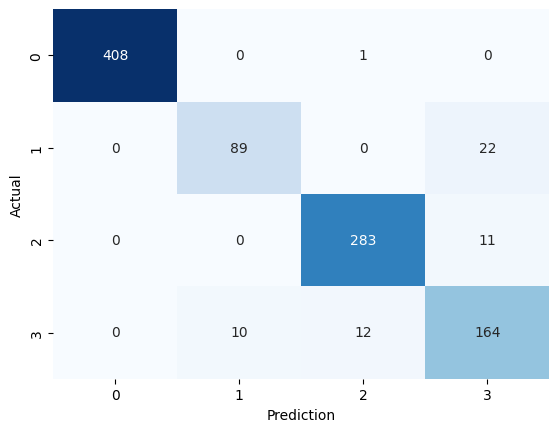

In [67]:
print_metrics(y_test_e, y_pred)